In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [2]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [3]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [4]:
# num_classes = dataset.num_classes
# num_classes

In [6]:
#Loading the dataset

names = [
    datasets.LionData,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.StripeSpotter,
    datasets.CTai
]

In [7]:
l = [
 'datasets.LionData',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.StripeSpotter',
 'datasets.CTai']

In [8]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/LionData',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/StripeSpotter',
 'data/CTai']

data/CTai


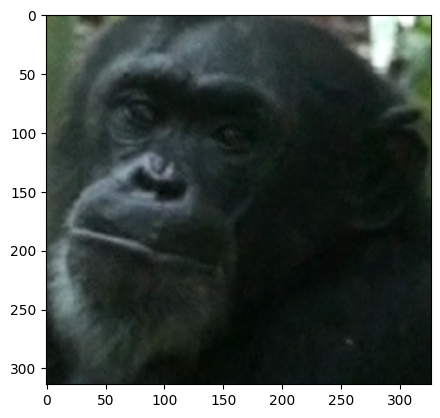

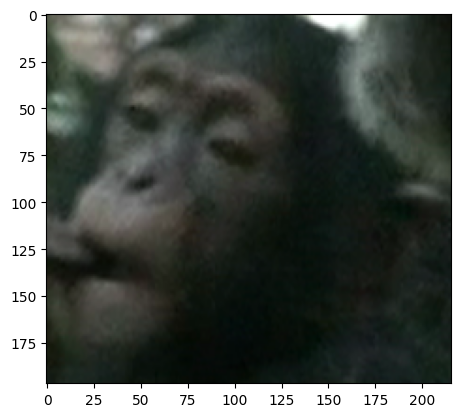

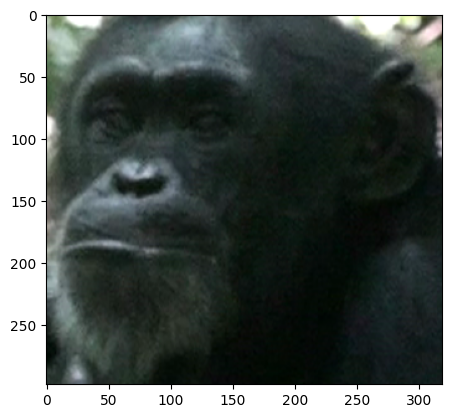

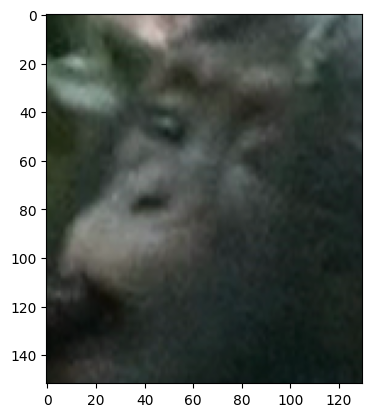

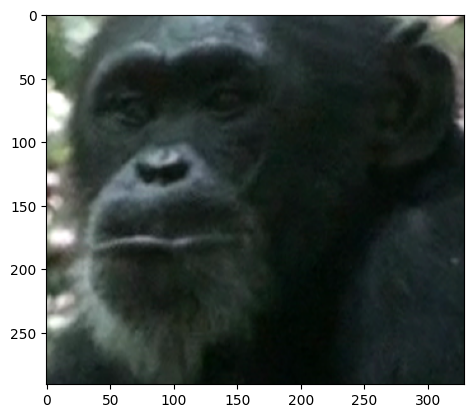

In [9]:
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split

root = roots[4]
print(root)
m = names[4](root)
print(m)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [11]:
df

,image_id,identity,path,keypoints,age,age_group,gender
0,0,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[81.0, 82.0, 159.0, 102.0, 70.0, 193.0, 244.0,...",32.0,Adult,Male
1,1,Victor,chimpanzee_faces-master\datasets_cropped_chimp...,"[48.0, 55.0, 99.0, 73.0, 20.0, 125.0, 152.0, 1...",3.0,Infant,Male
2,2,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[55.0, 88.0, 127.0, 89.0, 45.0, 184.0, 248.0, ...",32.0,Adult,Male
3,3,Victor,chimpanzee_faces-master\datasets_cropped_chimp...,"[47.0, 44.0, 94.0, 60.0, 14.0, 112.0, nan, nan...",3.0,Infant,Male
4,4,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[68.0, 74.0, 145.0, 64.0, 86.0, 171.0, 266.0, ...",32.0,Adult,Male
...,...,...,...,...,...,...,...
5073,5073,Besar,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 32.0, 16.0, 7.0, 35.0, 57.0, 41.0, ...",9.0,Juvenile,Male
5074,5074,Mkubwa,chimpanzee_faces-master\datasets_cropped_chimp...,"[17.0, 27.0, 41.0, 24.0, 10.0, 79.0, 98.0, 38....",39.0,Adult,Male
5075,5075,Atra,chimpanzee_faces-master\datasets_cropped_chimp...,"[26.0, 53.0, 53.0, 52.0, 39.0, 96.0, 99.0, 34....",17.0,Adult,Female
5076,5076,Kuba,chimpanzee_faces-master\datasets_cropped_chimp...,"[26.0, 19.0, 38.0, 19.0, 32.0, 42.0, nan, nan,...",2.0,Infant,Male


Number of identitites            72
Number of all animals            5078
Number of animals with one image 1
Number of unidentified animals   0


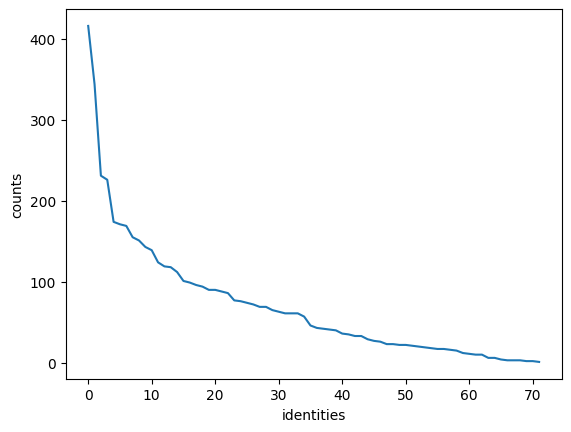

In [12]:
display_statistics(df)

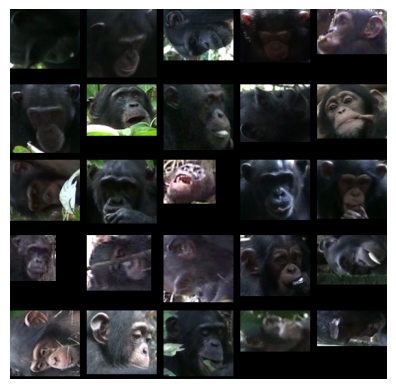

In [13]:
m.plot_grid(n_cols=5);

In [14]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'keypoints', 'age', 'age_group',
       'gender'],
      dtype='object')


In [15]:
unique_categories = df['identity'].unique()
print(unique_categories)

['Fredy' 'Victor' 'Fatima' 'unknown' 'Ibrahim' 'Oscar' 'Isha' 'Caramel'
 'Julia' 'Kuba' 'Shogun' 'Java' 'Jacobo' 'Ravel' 'Kiriku' 'Mbeli'
 'Kinshasa' 'Woodstock' 'Utan' 'Wala' 'Sagu' 'Wapi' 'Akrouba' 'Louise'
 'Lilou' 'Coco' 'Olivia' 'Atra' 'Akwaba' 'Athena' 'Sumatra' 'Sassandra'
 'Romario' 'Diva' 'Danane' 'Bienvenue' 'Baloo' 'Marc' 'Duna' 'Kabisha'
 'Inousha' 'Tita' 'Taboo' 'Totem' 'Endora' 'Linus' 'Voodoo' 'Zora' 'Zyon'
 'Eva' 'Mkubwa' 'Kaos' 'Huxel' 'Celine' 'Rubra' 'Alina' 'Mustapha' 'Besar'
 'Lucas' 'Haraka' 'Yucca' 'Olduvai' 'Yoghiti' 'Wendy' 'Zita' 'Mandy' 'Max'
 'Margot' 'Garuda' 'Gogol' 'Yao' 'Virunga']


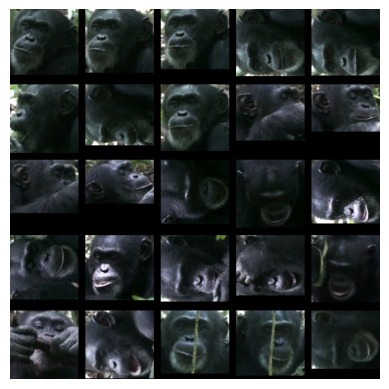

In [17]:
m.plot_grid(n_cols=5, idx=df['identity']=='Fredy');

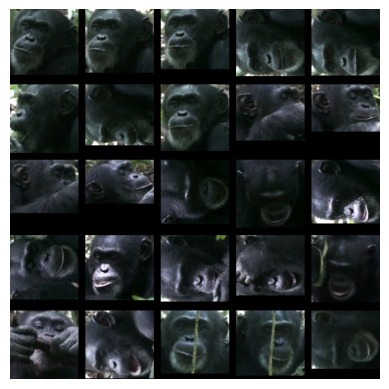

In [18]:
m.plot_grid(n_cols=5, idx=df['age']==32.0);

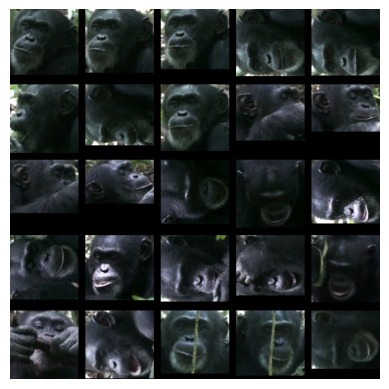

In [19]:
m.plot_grid(n_cols=5, idx=(df['age']==32.0)*(df['identity']=='Fredy'));

In [20]:
print(m)

In [21]:
df

,image_id,identity,path,keypoints,age,age_group,gender
0,0,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[81.0, 82.0, 159.0, 102.0, 70.0, 193.0, 244.0,...",32.0,Adult,Male
1,1,Victor,chimpanzee_faces-master\datasets_cropped_chimp...,"[48.0, 55.0, 99.0, 73.0, 20.0, 125.0, 152.0, 1...",3.0,Infant,Male
2,2,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[55.0, 88.0, 127.0, 89.0, 45.0, 184.0, 248.0, ...",32.0,Adult,Male
3,3,Victor,chimpanzee_faces-master\datasets_cropped_chimp...,"[47.0, 44.0, 94.0, 60.0, 14.0, 112.0, nan, nan...",3.0,Infant,Male
4,4,Fredy,chimpanzee_faces-master\datasets_cropped_chimp...,"[68.0, 74.0, 145.0, 64.0, 86.0, 171.0, 266.0, ...",32.0,Adult,Male
...,...,...,...,...,...,...,...
5073,5073,Besar,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 32.0, 16.0, 7.0, 35.0, 57.0, 41.0, ...",9.0,Juvenile,Male
5074,5074,Mkubwa,chimpanzee_faces-master\datasets_cropped_chimp...,"[17.0, 27.0, 41.0, 24.0, 10.0, 79.0, 98.0, 38....",39.0,Adult,Male
5075,5075,Atra,chimpanzee_faces-master\datasets_cropped_chimp...,"[26.0, 53.0, 53.0, 52.0, 39.0, 96.0, 99.0, 34....",17.0,Adult,Female
5076,5076,Kuba,chimpanzee_faces-master\datasets_cropped_chimp...,"[26.0, 19.0, 38.0, 19.0, 32.0, 42.0, nan, nan,...",2.0,Infant,Male


In [25]:
df['path'][0]

'chimpanzee_faces-master\\datasets_cropped_chimpanzee_faces\\data_CTai\\face_images/img-id1-object-1.png'

In [28]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CTai\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CTai\\chimpanzee_faces-master\\datasets_cropped_chimpanzee_faces\\data_CTai\\face_images/img-id1-object-1.png'

Number of images: 5078
Number of unique labels: 72


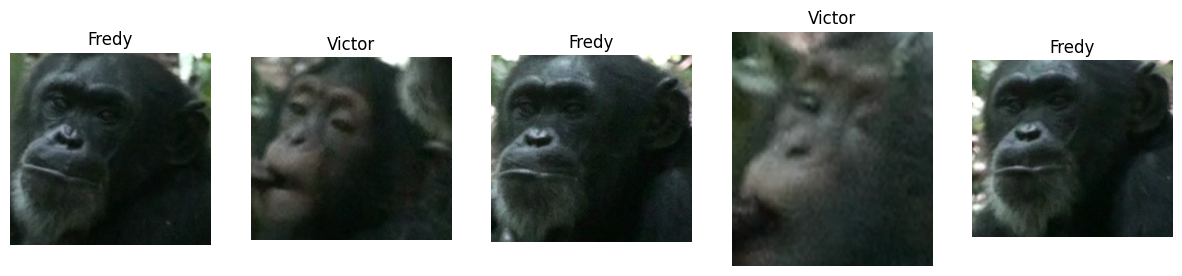

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
            labels.append(row['identity'])
    return images, labels

images, labels = load_images_from_dataframe(df)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [30]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [31]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [32]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.38
